In [1]:
! cp /content/drive/MyDrive/Colab_Notebooks/GAT/GAT_model.py ./
! cp /content/drive/MyDrive/Colab_Notebooks/GAT/datasets_list.py ./
! cp /content/drive/MyDrive/Colab_Notebooks/GAT/trainer.py ./
! cp -r /content/drive/MyDrive/Colab_Notebooks/GAT/datasets ./

In [2]:
import datasets.citeseer as citeseer
import torch
from torch import optim

from GAT_model import GAT
from trainer import Trainer
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

citeseer_data = citeseer.load_citeseer('datasets/citeseer/', device=device)

Using device: cuda
Tesla V100-SXM2-16GB
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [4]:
model = GAT(
    num_of_layers=2,
    num_heads_per_layer=[8, 8],
    num_features_per_layer=[citeseer.NUM_INPUT_FEATURES, 100, citeseer.NUM_CLASSES],
    add_skip_connection=False,
    bias=True,
    dropout=0.7,
)

optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-3)
trainer = Trainer(model=model, optimizer=optimizer, data=citeseer_data, return_logs=True)

logs_na = trainer.train(500)

----------------------
train 0.11375
val 0.19333333333333333
----------------------
train 0.14875
val 0.19833333333333333
----------------------
train 0.19875
val 0.2
----------------------
train 0.2025
val 0.20833333333333334
----------------------
train 0.21625
val 0.21583333333333332
----------------------
train 0.20625
val 0.2275
----------------------
train 0.25875
val 0.21833333333333332
----------------------
train 0.2625
val 0.20916666666666667
----------------------
train 0.30875
val 0.20416666666666666
----------------------
train 0.31875
val 0.2
----------------------
train 0.3875
val 0.19666666666666666
----------------------
train 0.375
val 0.1975
----------------------
train 0.4375
val 0.19833333333333333
----------------------
train 0.43625
val 0.1975
----------------------
train 0.40125
val 0.19916666666666666
----------------------
train 0.45125
val 0.19916666666666666
----------------------
train 0.425
val 0.20083333333333334
----------------------
train 0.48625
val 0

In [14]:
model = GAT(
    num_of_layers=3,
    num_heads_per_layer=[8, 8, 8],
    num_features_per_layer=[citeseer.NUM_INPUT_FEATURES, 100, 100, citeseer.NUM_CLASSES],
    add_skip_connection=True,
    bias=True,
    dropout=0.7,
)

optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-3)
trainer = Trainer(model=model, optimizer=optimizer, data=citeseer_data, return_logs=True)

logs_a = trainer.train(200)

----------------------
train 0.16375
val 0.15083333333333335
----------------------
train 0.22875
val 0.155
----------------------
train 0.35
val 0.16083333333333333
----------------------
train 0.40375
val 0.1625
----------------------
train 0.385
val 0.16416666666666666
----------------------
train 0.47
val 0.16666666666666666
----------------------
train 0.43375
val 0.17
----------------------
train 0.47875
val 0.17583333333333334
----------------------
train 0.4775
val 0.18
----------------------
train 0.49375
val 0.18333333333333332
----------------------
train 0.4975
val 0.1875
----------------------
train 0.5175
val 0.19333333333333333
----------------------
train 0.5275
val 0.2
----------------------
train 0.535
val 0.205
----------------------
train 0.5425
val 0.20833333333333334
----------------------
train 0.5725
val 0.21166666666666667
----------------------
train 0.5575
val 0.22083333333333333
----------------------
train 0.5625
val 0.22416666666666665
--------------------

In [16]:
! cp -r /content/drive/MyDrive/Colab_Notebooks/ClusterGCN/ ./
! cp -r /content/drive/MyDrive/Colab_Notebooks/ClusterGCN/input ./
! pip install torch-geometric -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
! pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
! pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
! pip install Texttable

! rm -rf ./input
! mkdir ./input
! cp -r /content/drive/MyDrive/Colab_Notebooks/input/input_citeseer/* ./input

! python ./ClusterGCN/src/main.py --clustering-method random --learning-rate 0.0001 --test-ratio 0.6

! rm -rf ./cluster_gcn_citeseer/
! mkdir ./cluster_gcn_citeseer/
! mv train_loss.csv val_loss.csv ./cluster_gcn_citeseer/

Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
+-------------------+----------------------+
|     Parameter     |        Value         |
+===================+======================+
| Cluster number    | 10                   |
+-------------------+----------------------+
| Clustering method | random               |
+-------------------+----------------------+
| Dropout           | 0.500                |
+-------------------+----------------------+
| Edge path         | ./input/edges.csv    |
+-------------------+----------------------+
| Epochs            | 200                  |
+-------------------+----------------------+
| Features path     | ./input/features.csv |
+-------------------+----------------------+
| Layers            | [16, 16, 16]         |
+-------------------+----------------------+
| Learning rate     | 0.000                |
+-------------------+-------------------

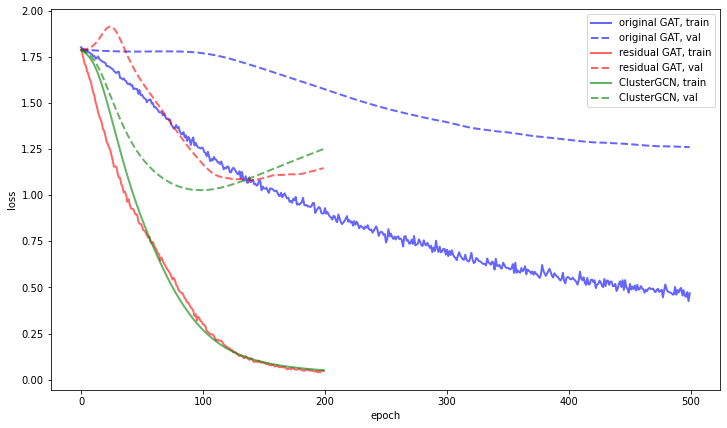

In [19]:
import pandas as pd

plt.figure(figsize=(12, 7))
plt.plot(logs_na['train_loss'], 'b', alpha=0.6, linewidth=2, label='original GAT, train')
plt.plot(logs_na['val_loss'], '--b', alpha=0.6, linewidth=2, label='original GAT, val')
plt.plot(logs_a['train_loss'], 'r', alpha=0.6,  linewidth=2, label='residual GAT, train')
plt.plot(logs_a['val_loss'], '--r', alpha=0.6,  linewidth=2, label='residual GAT, val')
plt.plot(pd.read_csv('./cluster_gcn_citeseer/train_loss.csv', header=None).values, 'g', alpha=0.6, linewidth=2, label='ClusterGCN, train')
plt.plot(pd.read_csv('./cluster_gcn_citeseer/val_loss.csv', header=None).values, '--g', alpha=0.6,  linewidth=2, label='ClusterGCN, val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('citeseer.pdf')
plt.show()